# CMPUT 200 Winter 2023
### Instructor:  Nidhi Hegde

# Assignment 2.  k-Anonymity

This assignment will be about k-anonymity.

Part 2 will be posted Monday (Feb 6) night.

### Instructions
**Deadline.**  The assignment is due at **11:59pm MST on Monday February 27**. If you submit by **11:59pm MST on Friday February 17**, you will get a bonus of 15 out of 100 marks for this assignment. Please check the syllabus for late submissions.

**Reminder.** You must submit your own work.  The collaboration policy for the assignments is Consultation Collaboration. You may verbally discuss concepts with your classmates, without exchanging written text, code, or detailed advice.  You must develop your own solution and submit your own work.  All sources of information used including books, websites, students you talked to, must be cited in the submission.  Please see the course FAQ document for details on this collaboration policy.  We will adhere to current Faculty of Science guidelines on dealing with suspected cases of plagiarism.

You must use this notebook to complete your assignment. You will execute the questions in the notebook. The questions might ask for a short answer in text form or for you to write and execute a piece of code. Make sure you enter your answer in either case only in the cell provided. Do not use a different cell and do not create a new cell. Creating new cells for your code is not compatible with the auto-grading system we are using and thus your assignment will not get grading properly and you will lose marks for that question.

Your submitted notebook should run on our local installation or on the syzygy platform.  So if you are importing packages not listed in the notebook or using local data files not included in the assignment package, make sure the notebook is self-contained.  If we cannot run your notebook, you will lose 50% of the marks, and any additional marks that may be lost due to wrong answers.

### Submission Instructions
When you are done, you will submit your work from the notebook. Make sure to save your notebook before running it, and then submit on eClass the notebook file with your work completed. Name your file with your lastname and the assignment number: Lastname_A2.ipynb


In [ ]:
# Run this cell to set up; Please don't change this cell.

import numpy as np
from numpy.random import default_rng
rng = default_rng()
import pandas as pd
from scipy.optimize import minimize

# These lines do some fancy plotting magic.
import matplotlib
# This is a magic function that renders the figure in the notebook, instead of displaying a dump of the figure object.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Assignment Information

This assignment will ask you to go through some analysis for k-anonymity.
The data used in this assignment is from the [UCI Adult data set](https://archive.ics.uci.edu/ml/datasets/adult), a very commonly used dataset, usually used for testing new algorithms.

The data files you will work with in this assignment are files with `.csv` extension.  This typically denotes a table with comma separated values.  In the case of the files you are using for this assignment, they are semicolon (`;`) separated values.  So be careful in how you import the data into a dataframe.

Some explanation on the files included for this assignment:
- `kanon-1.csv`:  a subset of the adult dataset where we have retained only the columns you will be working on.
- files `kanon-K.csv` :  a k-anonymized dataset where `K` is from `{5,10,50,100,500}`, created from `kanon-1.csv` by performing some generalization or suppression on quasi-identifier columns.
- attribute hierarchy files (`age-h.csv`, `education-h.csv`, `marital-status-h.csv`, `native-country-h.csv`, `occupation-h.csv`, `race-h,csv`, `salary-h.csv`, `sex-h.csv`, `workclass-h.csv`) - these files describe the ways in which each attribute was generalized.


## Part 1:  Analyzing the size of groups, or equivalence classes

We will start with the non-anonymized dataset, `kanon-1.csv`.  We want to analyze progressive levels of `k`-anonymity, so let's start by considering group sizes and equivalence classes for the non-anonymized data.  

We will first load the data.  The data is a semicolon separated values table, so we need to specify this as it is not the default.

Run the next cell without changing it.  After loading the data we will first examine properties like the size, what the columns and attributes look like, etc.

In [ ]:
df_k1 = pd.read_csv("kanon-1.csv", sep=';')
df_k1.shape

(30162, 9)

In [ ]:
df_k1.head()

,age,workclass,education,marital_status,occupation,race,sex,native_country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,<=50K


To analyze the groups and equivalence classes, we want to look at the uniqueness of each row. If a row is unique, this means there is no other row with the same values for the quasi-identifiers, making the individual in this row identifiable.  If the there are other rows with identical values for the quasi-identifiers, then this individual is in a group or equivalence class with those other individuals.  The larger this group the more anonymous this person since they are confounded in a large group.  For a group size of `k'`, the individuals in that group have `k'`-anonymity, and the entire table has `k`-anonymity where `k` is the smallest group size in the table.

The Adult dataset has one sensitive attribute, it is the target, or label in this dataset, `salary-class`.  So to determine uniqueness, we will look at what the uniqueness of each row is by grouping the values of the quasi-identifiers.  We first get a list of columns and remove the label, `salary-class`.

In the next cell write code to get a list of column labels and remove the label `salary-class`.


In [ ]:
# Get the list of column labels
columns = df_k1.columns.tolist()
# Remove the 'salary-class' label
columns.remove('salary-class')
columns


['age',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'race',
 'sex',
 'native_country']

Now we want to find the size of the group that each record, or row belongs to.

In the next cell write code to determine the size of the group for each row, and create a Series or an array called `group_size` that contains the list of these sizes, i.e. each element of the Series or array is the size of the group for the row that corresponds to that index.  So `group_size[i]` is the size of the group that the row, or record `i` belongs to.

Hint:  There are many way to get the size of the group that a record belongs to.  Take a look at the Dataframe function `groupby` as one example.

In [ ]:
group_size = df_k1.groupby(columns).transform('size')
group_size

0         1
1         2
2         1
3         1
4         1
         ..
30157     1
30158    12
30159     4
30160     7
30161     1
Length: 30162, dtype: int64

Let's now visualize these group sizes by plotting a histogram.  The following code will plot a histogram which shows, on the y-axis, the frequency of the group sizes in this table.

<Axes: >

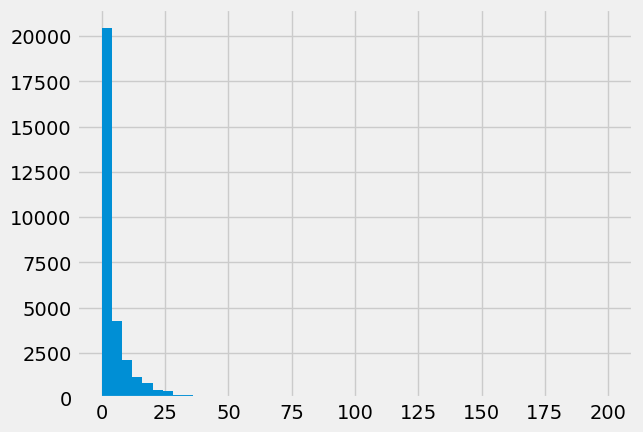

In [ ]:
# Just run this cell, do not change this line
group_size.hist(bins=50, range=[0,200])

#### Question 1

Explain what you see in the histogram.

*The histogram depicts the distribution of group sizes along the x-axis, with the frequency of these group sizes on the y-axis.*

*The histogram shows a heavily right-skewed distribution, with a high frequency of small group sizes (a narrow peak) that rapidly decreases as group size increase (a small spread). The histogram is unimodal. There is no outlier.*

*The peak of the histogram occurs at the very beginning, near the zero mark on the x-axis, suggesting that the largest number of groups have a small size. As the group size increases, the frequency of those groups sharply drops, which is evident from the height of the bars decreasing as we move right along the x-axis.*

*Larger group sizes are indicated by the histogram's tail, which stretches towards them at relatively low frequencies, suggesting that larger groups are not as common in this sample.*

*Although there is a long tail that extends over the group size of 25, the frequency of these sizes is much lower than that of the smallest groups.*



Now, let's write a function `groups_size` that does what we just did, for any given table.  The following function should accept as input (argument) a semi-colon separated `csv` filename as a string object, and should ouput a Series or array object that contains for each row, the number of rows that are identical in that table.

In [ ]:
def groups_size(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, sep=';')
    # Group the DataFrame by all columns and calculate the size of each group
    group_sizes = df.groupby(df.columns.tolist()).size()
    return group_sizes

# Example usage
filename = 'kanon-1.csv'
group_sizes = groups_size(filename)
print(group_sizes)

age  workclass         education     marital_status      occupation       race                sex     native_country  salary-class
17   Federal-gov       11th          Never-married       Adm-clerical     Black               Female  United-States   <=50K           1
     Local-gov         10th          Never-married       Other-service    White               Female  United-States   <=50K           1
                                                         Protective-serv  White               Female  United-States   <=50K           1
                       11th          Never-married       Adm-clerical     White               Female  United-States   <=50K           2
                                                         Craft-repair     White               Male    United-States   <=50K           1
                                                                                                                                     ..
90   Private           Some-college  Never-married   

Now we use this function `groups_size()` to generate histograms of the group size distribution for all k-anonymous tables.



*Do not change the following cell; just run it.*

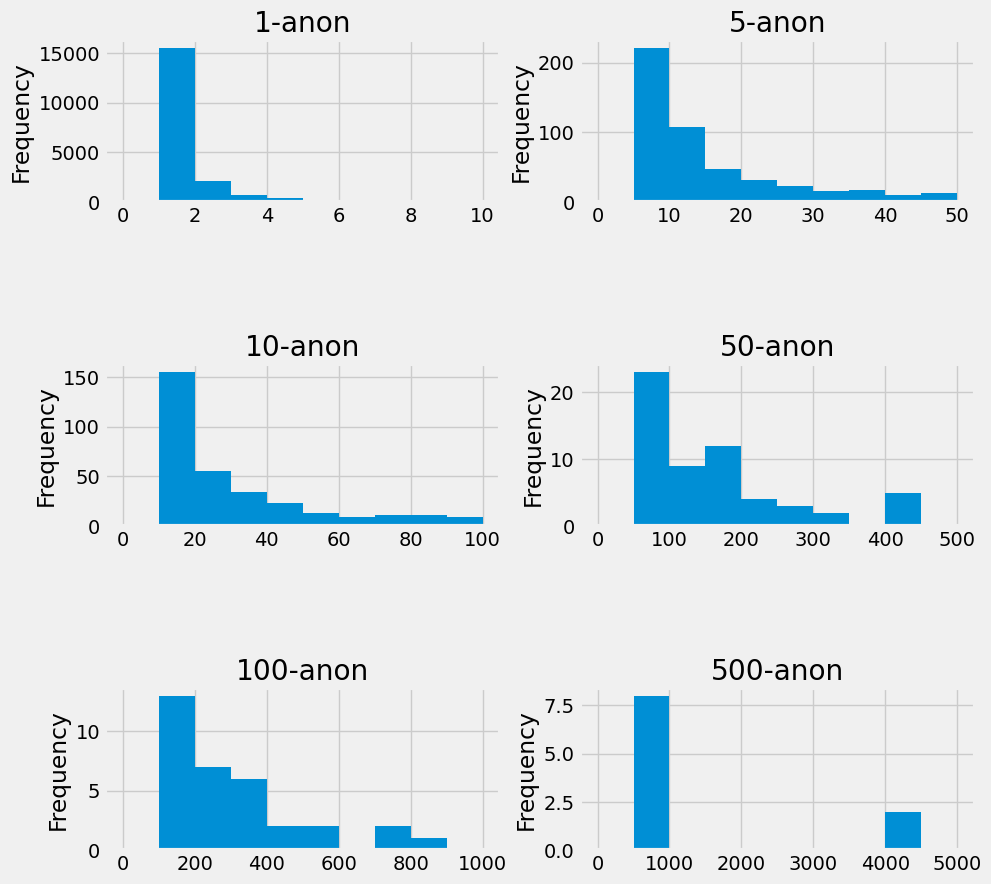

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(10,10))
kval = [1, 5, 10, 50, 100, 500]
for i, ax in enumerate(axes.reshape(-1)):
    fname = "kanon-"+ str(kval[i])+ ".csv"
    histarray = groups_size(fname)
    ax.set_title(str(kval[i])+"-anon")
    histarray.plot(kind="hist", ax=ax, range=[0,kval[i]*10])

fig.subplots_adjust(hspace=1)

#### Question 2

Looking at these histograms which represent the frequency of group size in each dataset, what do you conclude about the anonymization process?  Did it work as intended?  Does it satisfy `k-anonymity`?  For which `k`?  Explain.

*The histograms show the effectiveness of `k-anonymity`, ensuring each record is indistinguishable from at least `k-1` others based on certain attributes.*

*- **1-anon**: Most groups have a frequency over 10,000, providing little anonymity as every record is unique or nearly unique.*

*- **5-anon**: No groups have a frequency of 1, indicating no unique records. Frequencies are generally higher than 5. This group meets 5-anonymity*

*- **10-anon**: Frequencies vary, with the lowest under 20,  meeting 10-anonymity.*

*- **50-anon**: Shows a spread with no group having more than 50, not exactly meeting 50-anonymity.*

*- **100-anon**: Frequencies are closer to 0, lower chance of meeting 100-anonymity.*

*- **500-anon**: Lower frequencies suggest it does not satisfy 500-anonymity.*

*In conclusion, as `k` increases, the process becomes more effective, possibly meeting `k-anonymity` for lower `k` values, around `k=10` or `k=5`. For higher values like `k=100` and `k=500`, the datasets do not achieve `k-anonymity` due to groups with fewer than `k` records.*

## Part 2  Analyzing the accuracy vs privacy tradeoff

When we create the `k`-anonymous tables, we are doing so by suppression or generalization of features.  There is some information lost in doing this.  If this shared data is then used for some analysis, then there is a loss in the utility of that analysis.  The analysis could be calculating aggregate statistics, or training a machine model for predictions, etc.  So adding privacy protection when data sharing comes at the cost of accuracy or utility of our overall data analysis.

In this part we will examine this loss in accuracy in more detail.  In particular, we will use each of the tables we have for training a classification model and analyze the accuracy of the predictions.

The task we are interested in is predicting the salary class, given the remaining features.  The queries below have varying degrees of precision in the feature values, and we will apply this query on each of the k-anon tables.  The query applied to the `kanon-1` data will be our baseline, or the result we compare all other tables to.    Ideally our prediction of the salary class will be from some machine learning model, but here we will consider an even simpler method, explained below.  

A query will be of the following form: For rows that have the following feature values, predict the salary class: `"age=x1;work_class=x2;education=x3;marital-status=x4;occupation=x5;race=x5;sex=x6;native-country=x7"`

The simple prediction we will use here, is to calculate the probability of a salary-class as being the proportion of individuals in the table that satify that query and have that salary-class.  So for example, if the query is `"*;*;HS-grad;*;*;*;*"`, where `*` means any value, then we want to find the proportion of individuals that have a HS-grad as education and any value in the other fields, and have a salary-class > 50K (and, respectively <=50K).  I will show results on the first query on the `kanon-1` table below.

_Note_:  I have written very simple code in my example below.  You should feel free to write more efficient code if you can.  For instance, I'm using dictionaries to have one object that holds all the dataframes for the different values of k's.  Use the style that is most convenient to you and gives you what you're looking for.

In [ ]:
kval = [1, 5, 10, 50, 100, 500]
kval_s = map(str,kval)
dfk = {}
for item in kval_s:
    dfk[item]= pd.read_csv("kanon-" + item + ".csv", sep=';')
print(dfk)
for keys in dfk.keys():
    print(dfk[keys].head())

{'1':        age         workclass   education      marital_status  \
0       39         State-gov   Bachelors       Never-married   
1       50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2       38           Private     HS-grad            Divorced   
3       53           Private        11th  Married-civ-spouse   
4       28           Private   Bachelors  Married-civ-spouse   
...    ...               ...         ...                 ...   
30157   27           Private  Assoc-acdm  Married-civ-spouse   
30158   40           Private     HS-grad  Married-civ-spouse   
30159   58           Private     HS-grad             Widowed   
30160   22           Private     HS-grad       Never-married   
30161   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   race     sex native_country salary-class  
0           Adm-clerical  White    Male  United-States        <=50K  
1        Exec-managerial  White    Male  United-States        <=50K  
2      Handlers

The above code essentially loads all the k-anon tables into a collection of dataframes.

Let's first convert the fields to data types that are easier to handle.  We'll convert the `salary-class` to integer:

Run the cell below without changing it.

In [ ]:
salary_map={'<=50K':1,'>50K':0}
for keys in dfk.keys():
    dfk[keys]['salary-class']=dfk[keys]['salary-class'].map(salary_map)

print(dfk['1'].head(10))

   age         workclass  education         marital_status         occupation  \
0   39         State-gov  Bachelors          Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors     Married-civ-spouse    Exec-managerial   
2   38           Private    HS-grad               Divorced  Handlers-cleaners   
3   53           Private       11th     Married-civ-spouse  Handlers-cleaners   
4   28           Private  Bachelors     Married-civ-spouse     Prof-specialty   
5   37           Private    Masters     Married-civ-spouse    Exec-managerial   
6   49           Private        9th  Married-spouse-absent      Other-service   
7   52  Self-emp-not-inc    HS-grad     Married-civ-spouse    Exec-managerial   
8   31           Private    Masters          Never-married     Prof-specialty   
9   42           Private  Bachelors     Married-civ-spouse    Exec-managerial   

    race     sex native_country  salary-class  
0  White    Male  United-States             1  
1  White    

Let us now test a simple query, "`*;*;HS-grad;*;*;*;*;*`".  This essentially says:  "for any value in all features except education for which the feature value is `HS-grad`, we want to know the salary prediction.  The following cell will now group the dataframe only according to education (since that's the only one we have a value for), and write the mean for the salary class.  Since the value for the salary class is 1 if <=50K as per the previous code, this means that the mean value represents the proportion of the individuals with value 1, or those with salary <=50K, which is what we are looking for.

In [ ]:
dfk_qt = {}
dfk_qt['1'] = dfk['1'][['education','salary-class']].groupby(['education']).mean()
print(dfk_qt['1'])


              salary-class
education                 
10th              0.928049
11th              0.943702
12th              0.923077
1st-4th           0.960265
5th-6th           0.958333
7th-8th           0.937163
9th               0.945055
Assoc-acdm        0.746032
Assoc-voc         0.736802
Bachelors         0.578509
Doctorate         0.253333
HS-grad           0.835671
Masters           0.435771
Preschool         1.000000
Prof-school       0.250923
Some-college      0.799940



So from the above, the index `HS-grad` gives us the prediction we are looking for, 0.83.


In [ ]:
baseline_pred = dfk_qt['1'].loc['HS-grad','salary-class']
baseline_pred

0.8356707317073171

Now we want to calculate the prediction values for all other k-anon tables.  In this query we only have one feature with values, `education` so the prediction will be same for all `k` as we increase from `1` until there is a `k` where the k-anon table has a generalization for the edcuation feature.  First let's take a look at the file `education-h.csv` to see what generalizations were done.

In [ ]:
education_h = pd.read_csv("education-h.csv", sep=';')
print(education_h)

       Bachelors           Undergraduate     Higher education  *
0   Some-college           Undergraduate     Higher education  *
1           11th             High School  Secondary education  *
2        HS-grad             High School  Secondary education  *
3    Prof-school  Professional Education     Higher education  *
4     Assoc-acdm  Professional Education     Higher education  *
5      Assoc-voc  Professional Education     Higher education  *
6            9th             High School  Secondary education  *
7        7th-8th             High School  Secondary education  *
8           12th             High School  Secondary education  *
9        Masters                Graduate     Higher education  *
10       1st-4th          Primary School    Primary education  *
11          10th             High School  Secondary education  *
12     Doctorate                Graduate     Higher education  *
13       5th-6th          Primary School    Primary education  *
14     Preschool         

We see that there are three levels of generalization.  First a grouping according to `Primary School`, `High School`, etc.  Then according. to `Primary education`, `Secondary educaton`, etc,.  And finally by `*` which is effectively a suppression.

So for each k-anon file, starting with smallest `k` value and proceeding to larger values, we will see what the generalization for education is. If it is the same as the previous k, then we have the same prediction values (nothing has changed in the feature we are interested in; if the query had another feature with values other than `*`, then we should check that too).  If it is the next level of generalization, then we calculate the prediction.

So for the next value of k, 5, we check what the education feature looks like.  If it has the same values as for k=1, we keep the same prediction.  If it has the next generalization, we use that substitue value for `HS-grad`, which is `High School` and find the mean as we did above for this feature value.  We continute for all kanon tables until we hit the generalized value of `*`.

To measure the tradeoff between privacy and utility, we observe the difference of the predictions with the baseline, which we calculate for k=1.  This diffference is called the error in prediction.

Now write code below to do this for all the kanon tables, and enter the error values into an array `error` for all k.

In [ ]:
# Group the dataframe only according to education, and write the mean for the salary class
dfk_qt['5'] = dfk['5'][['education','salary-class']].groupby(['education']).mean()
dfk_qt['10'] = dfk['10'][['education','salary-class']].groupby(['education']).mean()
dfk_qt['50'] = dfk['50'][['education','salary-class']].groupby(['education']).mean()
dfk_qt['100'] = dfk['100'][['education','salary-class']].groupby(['education']).mean()
dfk_qt['500'] = dfk['500'][['education','salary-class']].groupby(['education']).mean()

# Initialize an empty array to store error values
error = []
kval = ['1','5', '10', '50','100','500']

# Calculate error for each k-anonymity table
for k in kval[1:]:
    if 'Secondary education' in dfk_qt[k].index:
        error.append(abs(dfk_qt[k].loc['Secondary education', 'salary-class'] - baseline_pred))
    else:
        error.append(None)  # If 'Secondary education' is not found, add None to error list

# Display the error values
print(error)


[0.030846606935457044, 0.03247263621803387, 0.040332185871092774, None, None]


We will now plot the prediction array.  Modify the code in the next cell according to your previous code so that the error is plotted, vs the k values.

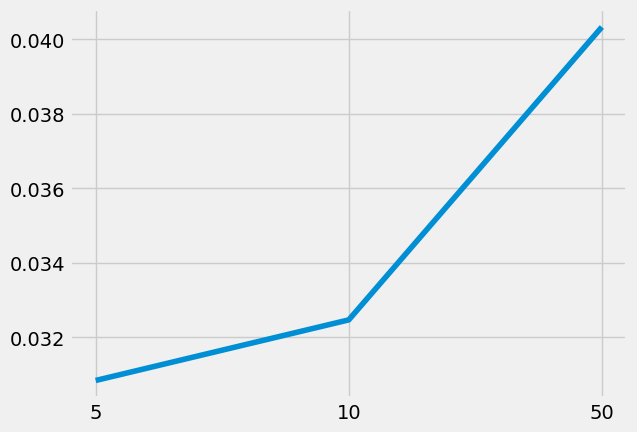

In [ ]:
# Plot the errors
plt.plot(kval[1:], error)

#### Question 3
What can you say about the error in the prediction estimate as k increases?  What does this say about the privacy- utility tradeoff?

*As k increases, the error in the prediction estimate also tends to increase. This observation suggests that there is a tradeoff between privacy and utility in k-anonymity.*

*When k is small, such as in the case of k=5, the data is less generalized and more specific, which allows for more accurate predictions. However, this also means that individual records are less protected in terms of privacy.*

*On the other hand, as k increases, the data becomes more generalized and less specific, leading to higher levels of privacy as individual records are more difficult to identify. However, this increased privacy comes at the cost of reduced utility, as the data is less informative and predictions become less accurate.*

*Therefore, the tradeoff between privacy and utility in k-anonymity can be summarized as follows: higher values of k provide greater privacy but lower utility, while lower values of k offer higher utility but lower privacy.*

Now do the same error analysis for the next queries



Query 2: "`*;*;*;*;Sales;*;*;*`"

In [ ]:
dfk_job = {}
dfk_job['1'] = dfk['1'][['occupation','salary-class']].groupby(['occupation']).mean()
print(dfk_job['1'])
baseline_sale = dfk_job['1'].loc['Sales','salary-class']
baseline_sale
occupation_h = pd.read_csv("occupation-h.csv", sep=';')
print(occupation_h)

# Group the dataframe only according to education, and write the mean for the salary class
dfk_job['5'] = dfk['5'][['occupation','salary-class']].groupby(['occupation']).mean()
dfk_job['10'] = dfk['10'][['occupation','salary-class']].groupby(['occupation']).mean()
dfk_job['50'] = dfk['50'][['occupation','salary-class']].groupby(['occupation']).mean()
dfk_job['100'] = dfk['100'][['occupation','salary-class']].groupby(['occupation']).mean()
dfk_job['500'] = dfk['500'][['occupation','salary-class']].groupby(['occupation']).mean()

# Initialize an empty array to store error values
error = []
kval = ['1','5', '10', '50','100','500']

# Calculate error for each k-anonymity table
for k in kval[1:]:
    if 'Nontechnical' in dfk_job[k].index:
        error.append(abs(dfk_job[k].loc['Nontechnical', 'salary-class'] - baseline_sale))
    else:
        error.append(None)  # If 'Nontechnical' is not found, add None to error list

# Display the error values
print(error)


                   salary-class
occupation                     
Adm-clerical           0.866165
Armed-Forces           0.888889
Craft-repair           0.774690
Exec-managerial        0.514780
Farming-fishing        0.883721
Handlers-cleaners      0.938519
Machine-op-inspct      0.875381
Other-service          0.958904
Priv-house-serv        0.993007
Prof-specialty         0.551511
Protective-serv        0.673913
Sales                  0.729353
Tech-support           0.695175
Transport-moving       0.797074
         Tech-support     Technical  *
0        Craft-repair     Technical  *
1       Other-service         Other  *
2               Sales  Nontechnical  *
3     Exec-managerial  Nontechnical  *
4      Prof-specialty     Technical  *
5   Handlers-cleaners  Nontechnical  *
6   Machine-op-inspct     Technical  *
7        Adm-clerical         Other  *
8     Farming-fishing         Other  *
9    Transport-moving         Other  *
10    Priv-house-serv         Other  *
11    Protective-ser

Plot the error next.

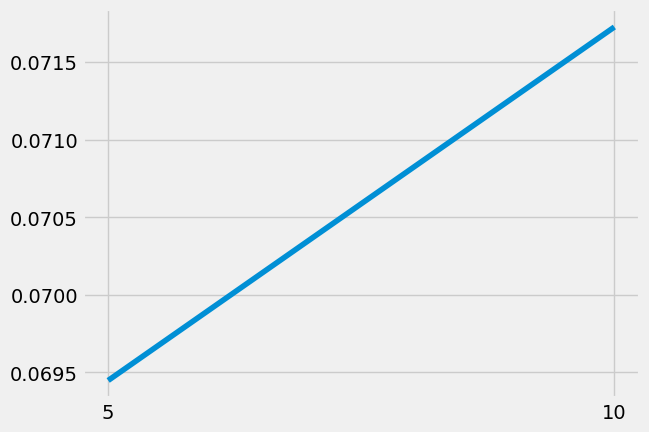

In [ ]:
plt.plot(kval[1:], error)

#### Question 4
What can you say about the error in the prediction estimate as k increases for this query?  What does this say about the privacy- utility tradeoff?

*The graph depicts a trend where the error in the prediction estimate decreases sharply as k increases from 5 to 10. The trend shown in the graph suggests that as k increases, which is increasing privacy measures, the utility (in terms of the accuracy of prediction estimates) decreases due to higher error rates. This is a common tradeoff in data privacy: improving privacy protection tends to reduce the precision or accuracy of the data analysis.*



Query 3: "`*;State-gov;*;*;*;*;*;*`"

In [ ]:
dfk_workclass = {}
dfk_workclass['1'] = dfk['1'][['workclass','salary-class']].groupby(['workclass']).mean()
print(dfk_workclass['1'])
baseline_state_gov = dfk_workclass['1'].loc['State-gov','salary-class']
baseline_state_gov
workclass_h = pd.read_csv("workclass-h.csv", sep=';')
print(workclass_h)

# Group the dataframe only according to occupation, and write the mean for the salary class
dfk_workclass['5'] = dfk['5'][['workclass','salary-class']].groupby(['workclass']).mean()
dfk_workclass['10'] = dfk['10'][['workclass','salary-class']].groupby(['workclass']).mean()
dfk_workclass['50'] = dfk['50'][['workclass','salary-class']].groupby(['workclass']).mean()
dfk_workclass['100'] = dfk['100'][['workclass','salary-class']].groupby(['workclass']).mean()
dfk_workclass['500'] = dfk['500'][['workclass','salary-class']].groupby(['workclass']).mean()

# Initialize an empty array to store error values
error = []
kval = ['1','5', '10','50','100','500']

# Calculate error for each k-anonymity table
for k in kval[1:]:
    if 'Government' in dfk_workclass[k].index:
          error.append(abs(dfk_workclass[k].loc['Government', 'salary-class'] - baseline_state_gov))
    else:
        error.append(None)  # If 'Government' is not found, add None to error list

# Display the error values
print(error)

                  salary-class
workclass                     
Federal-gov           0.612937
Local-gov             0.705370
Private               0.781208
Self-emp-inc          0.441341
Self-emp-not-inc      0.714286
State-gov             0.731040
Without-pay           1.000000
            Private  Non-Government  *
0  Self-emp-not-inc  Non-Government  *
1      Self-emp-inc  Non-Government  *
2       Federal-gov      Government  *
3         Local-gov      Government  *
4         State-gov      Government  *
5       Without-pay      Unemployed  *
6      Never-worked      Unemployed  *
[0.03884129334198372, 0.03426160579298121, 0.028679286465729592, 0.00870504064409594, 0.0030699420694464408]


Plot the error next.

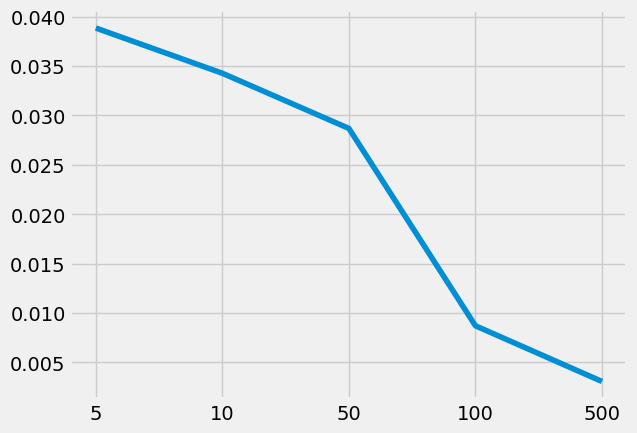

In [ ]:
plt.plot(kval[1:], error)

#### Question 5
What can you say about the error in the prediction estimate as k increases for this query?  What does this say about the privacy- utility tradeoff?

*The graph shows a decline in the error as the value of k increases from 5 to 500 .Regarding privacy-utility tradeoff, this graph could be interpreted as showing that increasing k improves the utility of the prediction (by reducing error).The data is focused on aggregate information rather than individual records, increasing k can reduce the variability caused by outliers or anomalous data points. In such cases, the generalization or suppression of data (to achieve higher k-anonymity) may help to smooth out noise and result in more accurate outcomes.*

#### Question 6
What can you say about the privacy-utilty tradeoff when considering the various features? Does this tradeoff differ across the different features?  If so, why do you think so?

*The privacy-utility tradeoff can vary across different features due to several factors:*

*Feature Sensitivity: Features that are more sensitive (e.g., salary, medical history) may require higher levels of privacy (e.g., lower values of k in k-anonymity) to protect individuals' privacy. However, increasing privacy may reduce the utility of the data for analysis.*

*Feature Importance: Some features may be more important for analysis or decision-making. Sacrificing privacy for these features may be justified if the utility gained is significant.*

*Data Distribution:* The distribution of data across different features can impact the tradeoff. Features with skewed distributions may require different privacy levels compared to features with more balanced distributions.

*Utility Requirements: The specific use case and utility requirements of the data analysis can influence the tradeoff. For example, in some cases, maintaining individual-level information may be crucial, while in others, aggregated data may be sufficient.*

*Domain Considerations: Different domains may have different privacy and utility requirements. For example, healthcare data may require higher privacy levels compared to demographic data.The tradeoff is acute: achieving sufficient privacy may come at a significant cost to the utility of the data.*

*The selection of 'k' in k-anonymity is feature-dependent and must be aligned with the respective privacy risks and the required data granularity for analysis. The greater the need for privacy, the higher the 'k' value needed, and the more likely the utility will be compromised. Conversely, in domains where utility can't be sacrificed, 'k' may be lower, but with an increased risk to privacy. The goal in each domain is to find the optimal balance that satisfies both privacy protection and data utility.*